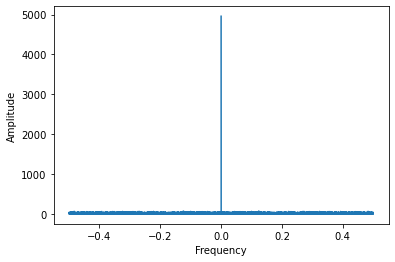

[4958.79777212 +0.j          -13.65899247-21.40024584j
  -10.90435325-14.02176242j ...   24.90363647 -2.31792836j
  -10.90435325+14.02176242j  -13.65899247+21.40024584j]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机时序数据
data = np.random.rand(10000)

# 对数据进行傅里叶变换
fft_result = np.fft.fft(data)

# 计算频率分量
freqs = np.fft.fftfreq(len(data))

# 取实部作为振幅
amplitudes = np.abs(fft_result.real)

# 绘制频域图
plt.plot(freqs, amplitudes)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


In [6]:
import numpy as np


def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result) // 2:]


data = np.random.randn(100, 100, 100)  # 三维数组，可以是任意维度
autocorr_data = np.apply_along_axis(autocorr, 0, data)  # 按第0个维度计算自相关函数


array([[[ 7.54514797e+01,  1.02812207e+02,  8.68565419e+01, ...,
          9.43233640e+01,  8.33852929e+01,  7.63960962e+01],
        [ 1.03445466e+02,  9.77517169e+01,  1.08114483e+02, ...,
          7.25619807e+01,  1.14564822e+02,  9.64970111e+01],
        [ 1.08471668e+02,  9.95377098e+01,  1.08085168e+02, ...,
          1.26235532e+02,  9.35540059e+01,  9.15198267e+01],
        ...,
        [ 1.17204941e+02,  9.75583740e+01,  8.69987092e+01, ...,
          1.01846873e+02,  1.04810725e+02,  9.64028848e+01],
        [ 1.03785289e+02,  9.19355099e+01,  9.14992580e+01, ...,
          1.31869912e+02,  8.86335551e+01,  1.07346302e+02],
        [ 1.13374621e+02,  9.56472600e+01,  7.53522705e+01, ...,
          1.35973545e+02,  9.26805031e+01,  8.67876448e+01]],

       [[-8.70770300e-01, -1.58977530e+01,  8.37077790e+00, ...,
          4.26841987e+00,  7.52680968e+00,  5.21866542e+00],
        [-1.05744059e+01, -9.88019675e+00, -2.06522140e+00, ...,
          3.03028180e+00, -8.42928142e

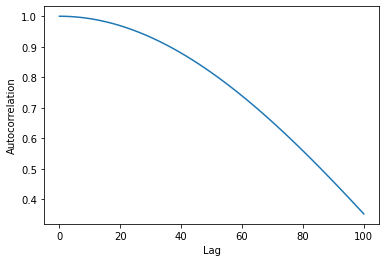

First peak at lag 0


In [7]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 生成示例数据
data = np.sin(np.linspace(0, 4 * np.pi, 1000))

# 计算ACF
acf = sm.tsa.acf(data, nlags=100)

# 绘制ACF图像
plt.plot(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# 找到第一个峰值
first_peak = np.argmax(acf > 0.2)
print(f"First peak at lag {first_peak}")

In [24]:
import numpy as np


def autocorr(x, t):
    """
    计算序列x在时延t下的自相关系数
    """
    return np.corrcoef(np.array([x[:-t], x[t:]]))


def mean_autocorr(x):
    """
    计算序列x的平均自相关系数
    """
    n = len(x)
    acorr = [autocorr(x, t)[0, 1] for t in range(1, n)]
    acorr = np.nan_to_num(acorr)
    return np.mean(acorr)


def max_autocorr(x):
    """
    计算序列x的最大自相关系数
    """
    n = len(x)
    acorr = [autocorr(x, t)[0, 1] for t in range(1, n)]
    acorr = np.nan_to_num(acorr)
    return np.max(acorr)


# 示例
x = [1, 2, 3, 1, 1, 3, 4, 5]
print("平均自相关系数：", mean_autocorr(x))
print("最大自相关系数：", max_autocorr(x))

平均自相关系数： 0.3520426757136591
最大自相关系数： 1.0


In [49]:
def periodicity(x):
    n = len(x)
    acf = np.zeros(n)
    for lag in range(1, n):
        print(lag)
        print(x[:-lag], x[lag:])
        acf[lag - 1] = np.corrcoef(np.array([x[:-lag], x[lag:]]))[0, 1]
        print(acf[lag - 1])
    acf = np.nan_to_num(acf)
    print(acf)
    max_corr = np.max(acf[1:])
    max_lag = np.argmax(acf[1:]) + 1
    return max_corr, max_lag


x = [1, 2, 3, 3, 2, 3]
max_corr, max_lag = periodicity(x)
if max_corr > 0.5:
    print(max_corr)
    print(f"存在周期性，周期为{max_lag}个单位")
else:
    print("不存在周期性")
    print(max_corr)

1
[1, 2, 3, 3, 2] [2, 3, 3, 2, 3]
0.21821789023599233
2
[1, 2, 3, 3] [3, 3, 2, 3]
-0.5222329678670935
3
[1, 2, 3] [3, 2, 3]
0.0
4
[1, 2] [2, 3]
0.9999999999999999
5
[1] [3]
nan
[ 0.21821789 -0.52223297  0.          1.          0.          0.        ]
0.9999999999999999
存在周期性，周期为3个单位


TypeError: Field elements must be 2- or 3-tuples, got '2'